<a href="https://colab.research.google.com/github/HernanDL/Noise-Cancellation-Using-GenAI/blob/main/Simple_CNN_(Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Load Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from google.colab import files
import IPython.display as ipd

# Step 2: Load Input Noise Waveform
uploaded = files.upload()

input_file = next(iter(uploaded))
input_waveform, sr = librosa.load(input_file)

Saving Acc-ord-B7-mf-N-T13d.wav to Acc-ord-B7-mf-N-T13d (1).wav


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2100
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2688
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2108
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1902
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1750
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1421
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1055
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0772
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0564
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0413
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0303
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0215
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0149
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0115
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0111
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0116
E

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 92947, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 46473, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 46471, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 23235, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1487040)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │     190,341,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 92949)               │      11,990,421 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,014,017 (2.26 GB)

 Trainable params: 202,338,005 (771.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 404,676,012 (1.51 GB)

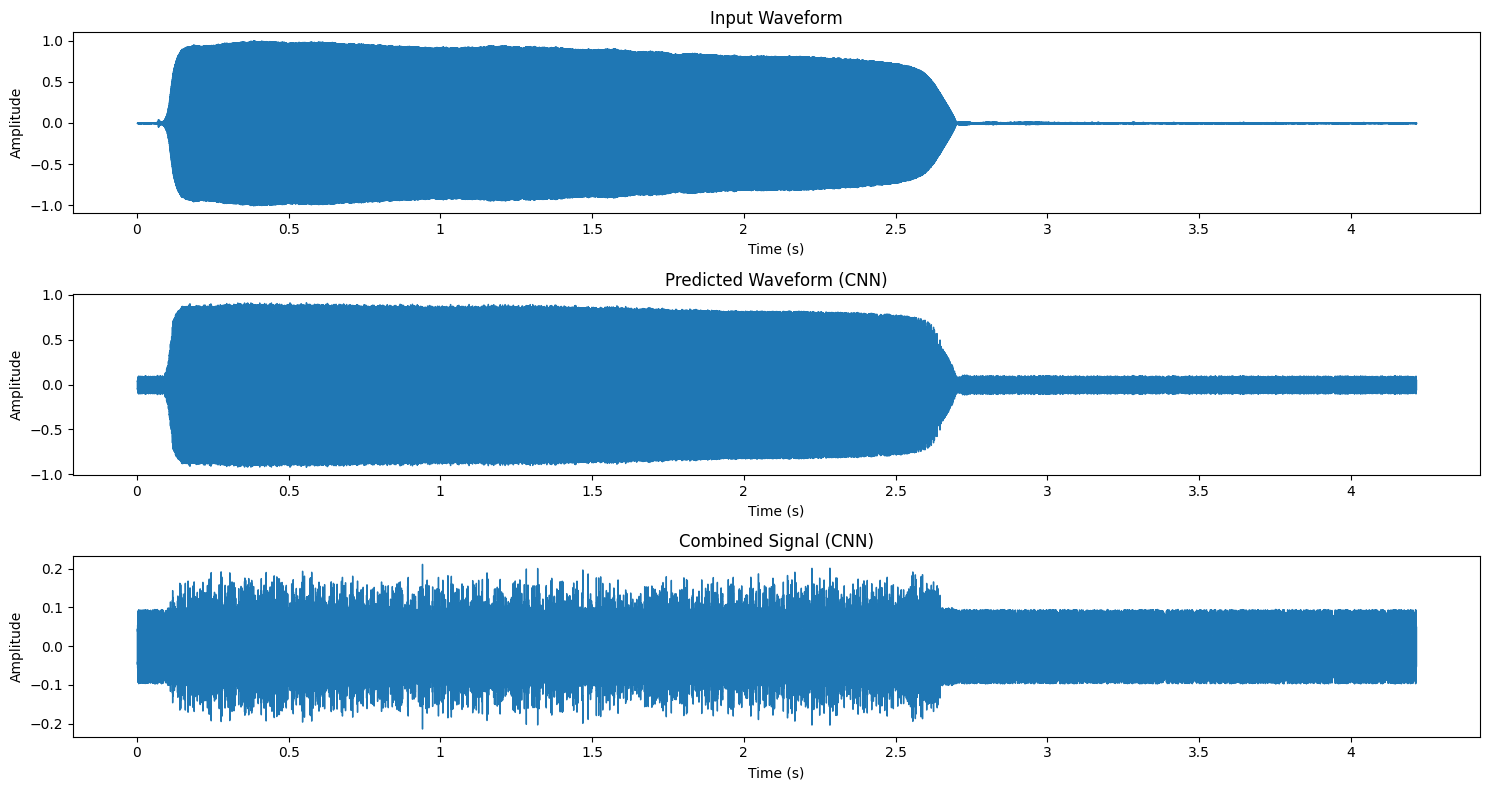

Playing Input Waveform:


Playing Predicted Waveform (CNN):


Playing Combined Signal (CNN):


In [4]:
# Step 3: Preprocess the Data
def preprocess_waveform(waveform):
    return waveform / np.max(np.abs(waveform))

input_waveform = preprocess_waveform(input_waveform)

# Reshape for CNN input (1 sample, length of waveform, 1 channel)
X_cnn = input_waveform.reshape(1, -1, 1)

# Step 4: Define the CNN Model with Input Layer
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_cnn.shape[1], X_cnn.shape[2])),  # Specify input shape here
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(input_waveform), activation='tanh')  # Output shape matches input shape
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the CNN Model
target_waveform = -input_waveform

# Train model (using a small number of epochs for demonstration)
cnn_model.fit(X_cnn, target_waveform.reshape(1, -1), epochs=30, verbose=1)

# Predict the output waveform using CNN
predicted_waveform_cnn = cnn_model.predict(X_cnn).flatten()

cnn_model.summary()

# Step 6: Visualize Results for CNN
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
librosa.display.waveshow(input_waveform, sr=sr)
plt.title('Input Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
librosa.display.waveshow(predicted_waveform_cnn, sr=sr)
plt.title('Predicted Waveform (CNN)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

combined_waveform_cnn = input_waveform + predicted_waveform_cnn

plt.subplot(3, 1, 3)
librosa.display.waveshow(combined_waveform_cnn, sr=sr)
plt.title('Combined Signal (CNN)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Audio Playback for CNN Results
print("Playing Input Waveform:")
ipd.display(ipd.Audio(input_waveform, rate=sr))

print("Playing Predicted Waveform (CNN):")
ipd.display(ipd.Audio(predicted_waveform_cnn, rate=sr))

print("Playing Combined Signal (CNN):")
ipd.display(ipd.Audio(combined_waveform_cnn, rate=sr))